In [17]:
import numpy as np
import pandas as pd
import datetime as dt
from pandas_datareader import data as wb
import matplotlib.pyplot as plt

In [18]:
# Datas
inicio = dt.date(2019,1,10)
fim = dt.date(2022,2,2)

In [19]:
# Nome dos índices de ações (índices das bolsas de valores)
indices = ['^GSPC','^IXIC','^GDAXI','^BVSP']

# Criamos o DataFrame vazio
ind_data = pd.DataFrame()

# Preenchemos o DataFrame com os dados dos índices
for a in indices:
    ind_data[a] = wb.DataReader(a, data_source='yahoo', start=inicio)['Adj Close']

In [23]:
# Novos nomes das colunas
ind_name = ['S&P 500', 'NASDAQ', 'DAX PERFORMANCE-INDEX', 'IBOVESPA']
ind_data.columns = ind_name

In [24]:
ind_data.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 776 entries, 2019-01-10 to 2022-02-07
Data columns (total 4 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   S&P 500                776 non-null    float64
 1   NASDAQ                 776 non-null    float64
 2   DAX PERFORMANCE-INDEX  761 non-null    float64
 3   IBOVESPA               746 non-null    float64
dtypes: float64(4)
memory usage: 30.3 KB


In [25]:
ind_data.head()

,S&P 500,NASDAQ,DAX PERFORMANCE-INDEX,IBOVESPA
Date,,,,
2019-01-10,2596.639893,6986.069824,10921.589844,93806.0
2019-01-11,2596.260010,6971.479980,10887.459961,93658.0
2019-01-14,2582.610107,6905.919922,10855.910156,94474.0
2019-01-15,2610.300049,7023.830078,10891.790039,94056.0
2019-01-16,2616.100098,7034.689941,10931.240234,94393.0


In [26]:
ind_data.tail()

,S&P 500,NASDAQ,DAX PERFORMANCE-INDEX,IBOVESPA
Date,,,,
2022-02-01,4546.540039,14346.000000,15619.389648,113147.000000
2022-02-02,4589.379883,14417.549805,15613.769531,112161.000000
2022-02-03,4477.439941,13878.820312,15368.469727,111696.000000
2022-02-04,4500.529785,14098.009766,15099.559570,112330.000000
2022-02-07,4512.939941,14208.732422,15222.290039,112027.578125


<AxesSubplot:xlabel='Date'>

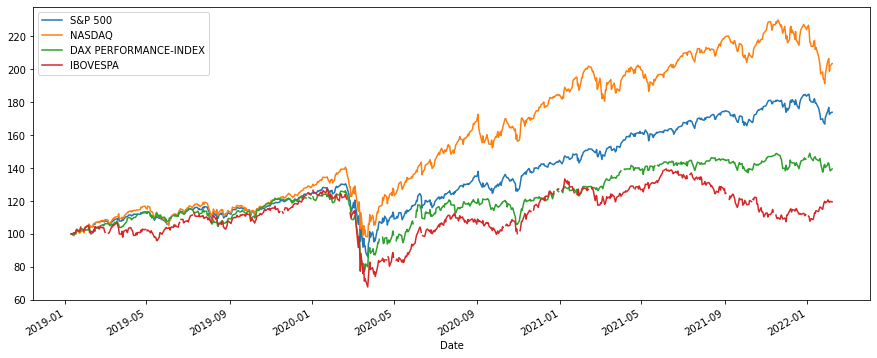

In [27]:
# Normalizando os índices e plotando
(ind_data / ind_data.iloc[0] * 100).plot(figsize=(15,6))

In [28]:
# Retorno simples dos índices
ind_returns = (ind_data / ind_data.shift(1)) - 1
ind_returns.tail()

,S&P 500,NASDAQ,DAX PERFORMANCE-INDEX,IBOVESPA
Date,,,,
2022-02-01,0.006863,0.007452,0.009578,0.006753
2022-02-02,0.009423,0.004987,-0.000360,-0.008714
2022-02-03,-0.024391,-0.037366,-0.015710,-0.004146
2022-02-04,0.005157,0.015793,-0.017498,0.005676
2022-02-07,0.002757,0.007854,0.008128,-0.002692


In [29]:
anual_ind_returns = ind_returns.mean() * 250
anual_ind_returns

S&P 500                  0.203219
NASDAQ                   0.259829
DAX PERFORMANCE-INDEX    0.111021
IBOVESPA                 0.119923
dtype: float64